# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 35.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 11.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=d4d4e1a6b1cda40d90f7c8b643c3ff31dd375e649d97cafe9dc1027c4d7beae3
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [2]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os
from matplotlib import rc 
rc('font', family='AppleGothic') 		
plt.rcParams['axes.unicode_minus'] = False  

import math as mt
import seaborn as sns
from tqdm import tqdm
import time

### 1-3. 한글 글꼴 설정(Windows)

In [ ]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Apple Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [ ]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [ ]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,176 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/aivle/miniProject/project4/train.csv')

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [ ]:
data.head(3)

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2


## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [ ]:
print(max(data['text'].str.len()))
print(min(data['text'].str.len()))

6012
9


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

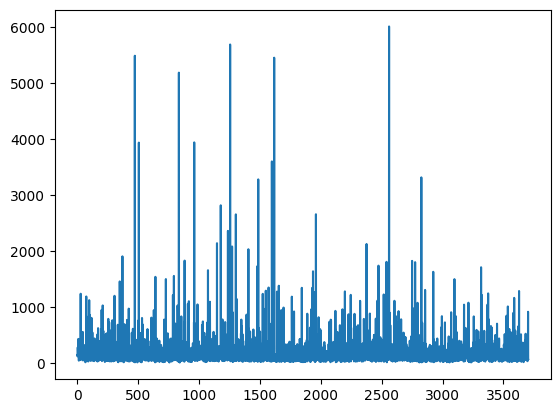

In [ ]:
plt.plot(data['text'].str.len())
plt.show()

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기 (1110/3)

In [ ]:
from konlpy.tag import Hannanum, Kkma, Komoran, Okt, Mecab, Twitter

In [ ]:
mecab = MeCab()

In [ ]:
txt = data['text'][0]
mec = mecab.pos(txt)

In [ ]:
print(mec)

[('self', 'SL'), ('.', 'SY'), ('convs', 'SL'), ('1', 'SN'), ('=', 'SY'), ('nn', 'SL'), ('.', 'SY'), ('ModuleList', 'SL'), ('(', 'SSO'), ('[', 'SSO'), ('nn', 'SL'), ('.', 'SY'), ('Conv', 'SL'), ('2', 'SN'), ('d', 'SL'), ('(', 'SSO'), ('1', 'SN'), (',', 'SC'), ('Co', 'SL'), (',', 'SC'), ('(', 'SSO'), ('K', 'SL'), (',', 'SC'), ('100', 'SN'), (')', 'SSC'), (')', 'SSC'), ('for', 'SL'), ('K', 'SL'), ('in', 'SL'), ('Ks', 'SL'), (']', 'SSC'), (')', 'SSC'), ('1', 'SN'), ('.', 'SF'), ('여기', 'NP'), ('서', 'JKB'), ('커널', 'NNG'), ('사이즈', 'NNG'), ('K', 'SL'), (',', 'SC'), ('100', 'SN'), ('은', 'NNG'), ('한', 'MM'), ('단어', 'NNG'), ('의', 'JKG'), ('최대', 'NNG'), ('길이', 'NNG'), ('가', 'JKS'), ('100', 'SN'), ('이', 'JKS'), ('넘', 'VV'), ('지', 'EC'), ('않', 'VX'), ('는다는', 'ETM'), ('가정', 'NNG'), ('으로', 'JKB'), ('그냥', 'MAG'), ('100', 'SN'), ('으로', 'JKB'), ('선언', 'NNG'), ('한', 'XSA+ETM'), ('것', 'NNB'), ('인지', 'VCP+EC'), ('궁금', 'XR'), ('합니다', 'XSA+EF'), ('.', 'SF')]


In [ ]:
noun=[]
pos=[]
for i in range(len(data['text'])):
    noun.append(mecab.nouns(data['text'][i]))
    pos.append(mecab.pos(data['text'][i]))

In [ ]:
# noun = pd.DataFrame(noun)
# pos = pd.DataFrame(pos)

### 3-2-1. 비교

In [ ]:
han = Hannanum()
mec = MeCab()
okt = Okt()
kkm = Kkma()
kom = Komoran()

In [ ]:
number=1000
texts = data['text'][:number]

100%|██████████| 500/500 [00:00<00:00, 1351.20it/s]


Text(0, 0.5, 'total seconds')

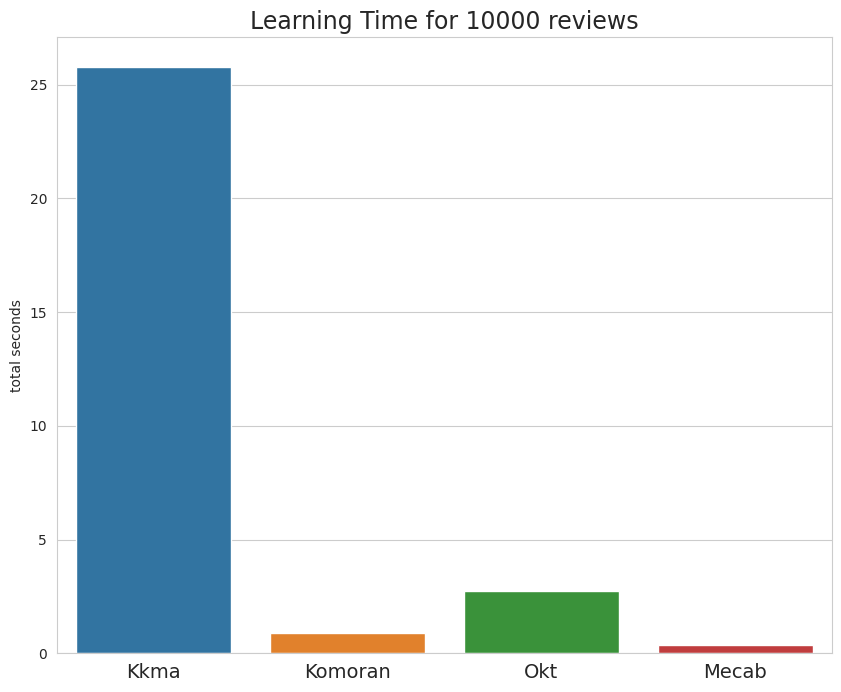

In [ ]:
def tagger_time(tagger, texts):
    time_sum = 0

    for sentence in tqdm(texts):
        t1 = time.time()
        try:
            tagger.morphs(sentence)
        except:
            pass
        t2 = time.time()

        time_sum += (t2 - t1)

    return time_sum

#texts = train['document'][:number]
time_list = []

for tagger in [kkm, kom, okt, mec]:
    time_list.append(tagger_time(tagger, texts))

sns.set_style('whitegrid')

tagger = ['Kkma', 'Komoran', 'Okt', 'Mecab']

plt.figure(figsize=(10,8))
# plt.bar(tagger, time_list, color=(0.4,0.7,0.5))
# plt.bar(tagger, time_list, color=colors)
sns.barplot(x=tagger, y=time_list)
plt.title('Learning Time for 10000 reviews', fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('total seconds')

In [ ]:
domain = range(0,number)
#el_list = []
def tagger_tracker(tagger, text):
    time_sum = 0
    el_list = []
    
    for sentence in tqdm(texts):
        t1 = time.time()
        try:
            tagger.morphs(sentence)
        except:
            pass
        t2 = time.time()
        
        time_sum += (t2 - t1)
        el_list.append(time_sum)
    
    return el_list

#texts0 = train['document'][:number]
lists = []

for tagger in [kkm, kom, okt, mec]:
    lists.append(tagger_tracker(tagger, texts))

100%|██████████| 500/500 [00:00<00:00, 1386.25it/s]


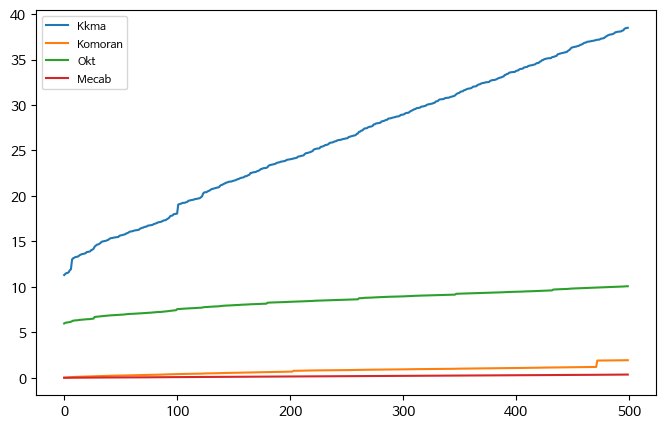

In [ ]:
tagger1 = ['Kkma', 'Komoran', 'Okt', 'Mecab']
plt.figure(figsize=(8,5))

for i, name in enumerate(tagger1):
    plt.plot(domain, lists[i], label = name)
    plt.legend(fontsize = 8)

plt.show()

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [ ]:
from nltk import Text
# from konlpy.corpus import kotext
from collections import Counter
from konlpy.utils import concordance, pprint
from matplotlib import pyplot
from nltk import collocations

In [ ]:
noun1= Text(noun)

In [ ]:
pos1 = Text(pos)

In [ ]:
nouns=[]
for n in noun1:
    nouns+=n

In [ ]:
pos_lis=[]
for p in pos1:
    pos_lis+=p

In [ ]:
print('nchars  :', len(nouns))
#print('ntokens :', len(nouns))
print('nmorphs :', len(set(nouns)))

nchars  : 57025
nmorphs : 3423


In [ ]:
cnt = Counter(nouns)

In [ ]:
print('\nTop 20 frequent morphemes:'); pprint(cnt.most_common(20))


Top 20 frequent morphemes:
[('것', 1093),
 ('수', 986),
 ('값', 801),
 ('데이터', 783),
 ('문제', 725),
 ('때', 714),
 ('코드', 712),
 ('실습', 609),
 ('번', 596),
 ('파일', 581),
 ('감사', 528),
 ('안녕', 528),
 ('오류', 521),
 ('부분', 510),
 ('질문', 503),
 ('문', 476),
 ('사용', 468),
 ('경우', 467),
 ('확인', 449),
 ('진행', 432)]


In [ ]:
print('nchars  :', len(pos_lis))
#print('ntokens :', len(nouns))
print('nmorphs :', len(set(pos_lis)))

nchars  : 297496
nmorphs : 11980


In [ ]:
cnt = Counter(pos_lis)
print('\nTop 20 frequent morphemes:'); pprint(cnt.most_common(20))


Top 20 frequent morphemes:
[(('(', 'SSO'), 6450),
 ((',', 'SC'), 6342),
 (('-', 'SY'), 5845),
 (('.', 'SF'), 5557),
 ((')', 'SSC'), 5517),
 (('_', 'SY'), 5425),
 (('.', 'SY'), 5226),
 (('=', 'SY'), 4081),
 (('하', 'XSV'), 3605),
 (('가', 'JKS'), 3373),
 (('을', 'JKO'), 3228),
 (("'", 'SY'), 3185),
 (('는', 'ETM'), 3014),
 (('이', 'JKS'), 2982),
 (('를', 'JKO'), 2956),
 (('에', 'JKB'), 2801),
 ((':', 'SC'), 2795),
 (('?', 'SF'), 2773),
 (('[', 'SSO'), 2688),
 (('1', 'SN'), 2483)]


In [ ]:
measures = collocations.BigramAssocMeasures()
print('\nCollocations among tagged words:')
finder = collocations.BigramCollocationFinder.from_words(pos_lis)
pprint(finder.nbest(measures.pmi, 10))


Collocations among tagged words:
[(('"\\\'",', 'SY'), ('"\\\\\'")', 'SY')),
 (('"\\\\",', 'SY'), ('"\\\\\\\\")', 'SY')),
 (('"]\').', 'SY'), ('click', 'SL')),
 (('&,', 'SY'), ('**,', 'SY')),
 (("'~',", 'SY'), ("'!']))", 'SY')),
 (('*%', 'SY'), ('**%%', 'SY')),
 (('**%%', 'SY'), ('***%%%', 'SY')),
 (('***%%%', 'SY'), ('****%%%%', 'SY')),
 (('****%%%%', 'SY'), ('*****%%%%%', 'SY')),
 (("+'", 'SY'), ("'+", 'SY'))]


In [ ]:
print('\nCollocations among words:')
finder = collocations.BigramCollocationFinder.from_words(nouns)
pprint(finder.nbest(measures.pmi, 10))


Collocations among words:
[('가우', '시안'),
 ('간격', '가여'),
 ('강남', '구청'),
 ('겉옷', '셔츠'),
 ('게이트', '웨이'),
 ('경복궁', '덕수궁'),
 ('경제력', '적극'),
 ('관례', '일체'),
 ('광명시', '광주시'),
 ('광역시', '가평군')]


In [ ]:
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"

In [ ]:
cnt = Counter(nouns)

In [ ]:
tags = [{ 'color': color(), 'tag': n, 'size': c*multiplier } for n, c in count.most_common(ntags)]

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

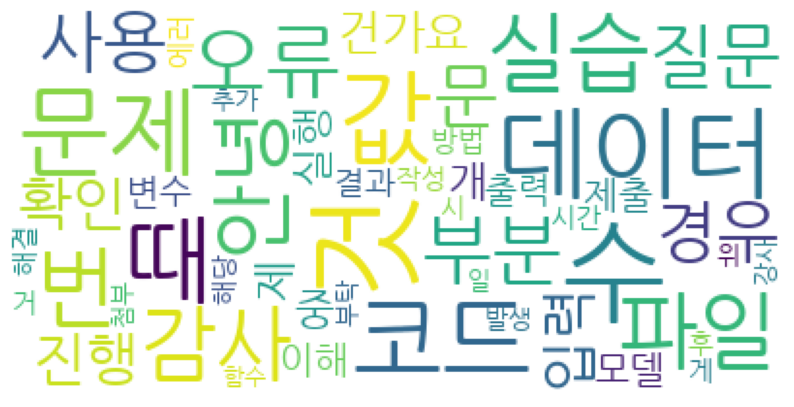

In [ ]:
wc = WordCloud(font_path=FONT_PATH,background_color="white", max_font_size=60, max_words=50)
cloud = wc.generate_from_frequencies(dict(cnt))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
data['text'].loc[data['label']==None]

Series([], Name: text, dtype: object)

In [ ]:
def text_analysis(data, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    mecab = MeCab()
    labels=[]
    if label == None:
        texts = data['text']
    else:
        texts = data['text'].loc[data['label']==label]

    texts = pd.DataFrame(texts)
    texts.reset_index()
    
    for i in range(len(texts)):
        labels.append(mecab.nouns(texts['text'][i]))

    label_text = Text(labels)

    label_concat=[]
    for p in label_text:
        label_concat+=p

    print('nchars  :', len(label_concat))
    #print('ntokens :', len(nouns))
    print('nmorphs :', len(set(label_concat)))
    
    cnt = Counter(label_concat)
    print('\nTop 20 frequent morphemes:'); pprint(cnt.most_common(20))
    
    measures = collocations.BigramAssocMeasures()
    print('\nCollocations among tagged words:')
    finder = collocations.BigramCollocationFinder.from_words(label_concat)
    pprint(finder.nbest(measures.pmi, 10))

    #Word Cloud
    wc = WordCloud(font_path=FONT_PATH,background_color="white", max_font_size=60, max_words=50)
    cloud = wc.generate_from_frequencies(dict(cnt))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    pass

In [ ]:
data.label.unique()

array(['코드2', '웹', '이론', '코드1', '시스템 운영', '원격'], dtype=object)

### 4-2. 각각의 문의 유형에 대해 실행합니다.

In [ ]:
for label in sorted(data.label.unique()):
    text_analysis(data,label)
    print(label)

KeyError: ignored

In [ ]:
labels=[]
texts = data['text'].loc[data['label']=='코드2']
texts = pd.DataFrame(texts)
texts.reset_index(drop=True)
# for i in range(len(texts)):
#     labels.append(mecab.nouns(texts['text'][i]))
# labels.append(mecab.nouns(texts['text'][1]))
# for txt in texts['text']:
#     labels.append(mecab.nouns(txt['text']))
texts

,text
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ..."
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals..."
4,filename = TEST_IMAGE + str(round(frame_sec)) ...
10,만약\n각각 결측치가 하나씩 있는 경우를 제외하고\nOzone 열에도 Solar....
...,...
3683,너무 큰 차이라 confusion matrix도 값 차이가 아주 크게 나옵니다. \...
3686,분류의 경우\nhiddenlayer에 활성화 함수가 relu로 설정이 되어도\nou...
3693,실습문제 7 에서\n1~3번까지는 아래와 같이 코드 진행했습니다\n\ndf_tota...
3696,시간(hour)은 범주형데이터라서 피벨류가 0이여서 groupby로 묶었습니다. 근...


# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

### 5-2. Train Validation split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk

In [ ]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
prepro = data.replace({'label': label_dict}).copy()

In [ ]:
# text.text_analysis(prepro)
prepro.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
target='label'
x = prepro.drop(target, axis=1)
y = prepro[target]

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=1)

In [ ]:
x_train.head(3)

,text
839,교육교안을 다운받으려고 하는데 다운로드가 되지 않습니다.\n혹시 오류가 있는 걸 까요?
1475,# 케이스 분류\nfor i in range(n) :\n for j in ra...
662,Machine settings file 'C:\Users\User\VirtualBo...


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [ ]:
x_train

,text,token
839,교육교안을 다운받으려고 하는데 다운로드가 되지 않습니다\n혹시 오류가 있는 걸 까요,NaN
1475,케이스 분류\nfor i in rangen \n for j in rangek...,NaN
662,Machine settings file CUsersUserVirtualBox VMs...,NaN
188,전동 킥보드를 주로 사용하며 대기 시간이 긴 것을 싫어하는 2040대를 위해\n반납...,NaN
3569,CUsersUseranaconda3libsitepackagesseaborndecor...,NaN
...,...,...
2763,안녕하세요 아까 11시쯤 원격으로 화면 조정 도와주셨었는데 다시 진행해주실 수 있을...,NaN
905,안녕하세요 튜터님\ncmd 창에서 pip install pillow를 실행하다가 뭔...,NaN
1096,안녕하세요 \n\n예제 입력 1 의 내용이\n4\n0 1 2 1\n1 0 3 2\n...,NaN
235,셀프테스트 관련 문의입니다\n\n제가 클라우드 UX UI 셀프테스트 볼때 예비군훈련...,NaN


## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [ ]:
import re

# str = "AA**BB#@$CC 가나다-123"
x_train['text'] = x_train['text'].str.replace("[^\uAC00-\uD7A30-9a-zA-Z\s]"," ")
x_train['text'].replace('', np.nan, inplace=True)
x_train

<ipython-input-15-f2c1e1a8fadc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  x_train['text'] = x_train['text'].str.replace("[^\uAC00-\uD7A30-9a-zA-Z\s]"," ")


,text
839,교육교안을 다운받으려고 하는데 다운로드가 되지 않습니다 \n혹시 오류가 있는 걸 까요
1475,케이스 분류\nfor i in range n \n for j in ra...
662,Machine settings file C Users User VirtualBo...
188,전동 킥보드를 주로 사용하며 대기 시간이 긴 것을 싫어하는 20 40대를 위해\n...
3569,C Users User anaconda3 lib site packages seab...
...,...
2763,안녕하세요 아까 11시쯤 원격으로 화면 조정 도와주셨었는데 다시 진행해주실 수 ...
905,안녕하세요 튜터님 \ncmd 창에서 pip install pillow를 실행하다가 ...
1096,안녕하세요 \n\n예제 입력 1 의 내용이\n4\n0 1 2 1\n1 0 3 2\...
235,셀프테스트 관련 문의입니다\n\n제가 클라우드 UX UI 셀프테스트 볼때 예비군훈...


In [ ]:
# str = "^[ㄱ-ㅎ ㅏ-ㅣ 가-힣]"
# \uAC00-\uD7A30 : 모든 한글 음절(가-힣)
# a-z : 영어 소문자
# A-Z : 영어 대문자
# 0-9 : 숫자
# \s : 띄어쓰기
x_test['text'] = x_test['text'].str.replace("[^\uAC00-\uD7A30-9a-zA-Z \s]"," ")
x_test['text'].replace('', np.nan, inplace=True)
x_test

<ipython-input-16-e63de9c5e4ac>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  x_test['text'] = x_test['text'].str.replace("[^\uAC00-\uD7A30-9a-zA-Z \s]"," ")


,text
3582,certutil urlcache f http 31 44 7 100 test ...
2073,제출하기를 눌렀으나 페이지가 무한 로딩이 걸리고 강의 영상 또한 제대로 나오지 않아...
2425,상관 분석을 직선으로 표현한 게 상관계수\n상관계수는 기울기를 표현해 주지 못 함 ...
93,coding utf 8 \nimport sys\nimport ma...
79,안녕하세요 강사님 \nbatch normalization과 dropout 에 관...
...,...
1870,전처리 하는부분 실행시키면 이미지가 안떠서 질문드립니다 \n 그리고 image 파...
3392,3 생산 개발 과 4 필요기술 설비 부분이 비슷한 것 같은데 이렇게 작성하는 것...
75,채점 했을때는 전부 pass로 뜨는데 제출하면 오답이라고 하는데 제출할 때 다른 케...
1073,실습해보세요 \nimport matplotlib pyplot as plt\n m...


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만' , '겜', '되', '음', '면']

In [ ]:
mecab =MeCab()

In [ ]:
x_train['token'] = x_train['text'].apply(mecab.morphs)
x_train['token'] = x_train['token'].apply(lambda x :[item for item in x if item not in stopwords])

x_test['token'] = x_test['text'].apply(mecab.morphs)
x_test['token'] = x_test['token'].apply(lambda x :[item for item in x if item not in stopwords])

In [ ]:
# x_train = x_train['token'].values
# x_train

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [ ]:
ngram = CountVectorizer(tokenizer=mecab.morphs)
ngram.fit(x_train['text'])
# ngram.vocabulary_ #n-gram 기반 vocab


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<bound method MeCab.morphs of <mecab.mecab.MeCab object at 0x7f57d8e74310>>)

In [ ]:
ngram.fit_transform(x_train['text'])

<3335x9293 sparse matrix of type '<class 'numpy.int64'>'
	with 137171 stored elements in Compressed Sparse Row format>

In [ ]:
mecab_tokenizer(x)

NameError: ignored

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
x_train.head(3)

AttributeError: ignored

In [ ]:
x_tr_lis = x_train['token'].astype('str').tolist()

In [ ]:
type(x_tr_lis)

list

In [ ]:
w2v_embedding = Word2Vec(sentences=x_tr_lis, window=5, min_count=5, workers=4, sg=0)

In [ ]:
w2v_embedding.wv.most_similar('전처리')

[('과정', 0.9860554337501526),
 ('후', 0.9783685207366943),
 ('려고', 0.9782388806343079),
 ('까지', 0.9762763381004333),
 ('지금', 0.9735191464424133),
 ('코딩', 0.9709546566009521),
 ('이미지', 0.9705924391746521),
 ('과제', 0.9693753123283386),
 ('어제', 0.9675102233886719),
 ('업로드', 0.9655506610870361)]

In [ ]:
embedding_size=100
tokenized_words = x_tr_lis
temp = get_sent_embeddings(w2v_embedding, embedding_size, tokenized_words)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### Huggingface Tokenizer

In [ ]:
!pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tokenizers import BertWordPieceTokenizer

In [ ]:
tokenizer = BertWordPieceTokenizer(lowercase=False, strip_accents=False)

In [ ]:
x_train['text'].to_csv('x_train.csv')
x_test['text'].to_csv('x_test.csv')

In [ ]:
tokenizer.train(
    files= 'x_train.csv',
    vocab_size = 30000,
    limit_alphabet =6000,
    min_frequency = 5
)

In [ ]:
tokenizer.save_model('./')

['./vocab.txt']

In [ ]:
vocab = pd.read_fwf('vocab.txt',header=None)

In [ ]:
# x_train['hf_bert_token'] = tokenizer.encode(x_train['text'])
x_train['hf_bert_token'] = x_train['text'].apply(lambda x: tokenizer.encode(x).ids)
x_test['hf_bert_token'] = x_test['text'].apply(lambda x: tokenizer.encode(x).ids)

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [ ]:
max_len = max(len(i) for i in x_train['hf_bert_token'])
max_len

1097

In [ ]:
x_train_hf = x_train['hf_bert_token']
x_test_hf = x_test['hf_bert_token']

In [ ]:
x_train_hf = pd.DataFrame(x_train_hf)
x_test_hf = pd.DataFrame(x_test_hf)

In [ ]:
x_train_hf.reset_index(inplace=True)
x_test_hf.reset_index(inplace=True)

In [ ]:
x_train_hf.drop('index', axis=1, inplace=True)
x_test_hf.drop('index', axis=1, inplace=True)

In [ ]:
x_train_hf[:5]
x_test_hf[:3]

,hf_bert_token
0,"[8338, 2244, 1097, 6389, 48, 2453, 2262, 3937,..."
1,"[8066, 1068, 4686, 2682, 5302, 5927, 6680, 109..."
2,"[2354, 3981, 786, 1095, 1919, 3183, 1137, 95, ..."


In [ ]:
x_train_hf_lis = x_train_hf['hf_bert_token'].values
x_test_hf_lis= x_test_hf['hf_bert_token'].values

In [ ]:
max_words = 35000 ## 위에서 설정하길 35000
embedding_dim = 128 ## 단어 embedding 차원
max_len = 1100 ## 문장 최대 길이 -> 통일해 둘 문장 길이

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train_hf_pad = pad_sequences(x_train_hf_lis, maxlen = max_len)
x_test_hf_pad = pad_sequences(x_test_hf_lis, maxlen = max_len)

array([[   0,    0,    0, ..., 2025,   90, 5367],
       [   0,    0,    0, ..., 1973, 2104, 2736],
       [   0,    0,    0, ..., 1069, 2396, 2300],
       [   0,    0,    0, ...,  870, 1602, 2088],
       [   0,    0,    0, ..., 2066, 3704, 3791]], dtype=int32)

In [ ]:
import scipy.sparse
import numpy as np
get_dataset()
np.save('x_train', arr=x_train_hf_pad)
scipy.sparse.save_npz('x_train', x_train_hf_pad)


NameError: ignored

In [ ]:
# not0train_idx = x_train.sum(1) > 0
# not0test_idx = x_test.sum(1) > 0

# train_data = train_data.loc[not0train_idx].reset_index(drop=True)
# test_data = test_data.loc[not0test_idx].reset_index(drop=True)

# x_train = x_train[not0train_idx]
# y_train = y_train[not0train_idx]

# x_test = x_test[not0test_idx]
# y_test = y_test[not0test_idx]

AttributeError: ignored

In [ ]:
x_train_hf_df = pd.DataFrame(x_train_hf_pad)

In [ ]:
x_test_hf_df = pd.DataFrame(x_test_hf_pad)

array([[   0,    0,    0, ..., 2025,   90, 5368],
       [   0,    0,    0, ..., 1973, 2104, 2736],
       [   0,    0,    0, ..., 1131, 2396, 2300],
       ...,
       [   0,    0,    0, ...,   93, 2296, 2020],
       [   0,    0,    0, ..., 1198, 2568, 2034],
       [   0,    0,    0, ..., 2733, 9279, 3114]], dtype=int32)

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPool1D
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, SimpleRNN, GRU

from tensorflow.keras.models import Sequential

In [ ]:
keras.backend.clear_session()

model = Sequential()

model.add(Embedding( max_words, # 사용할 총 token수
                    embedding_dim, #한 토큰 당 몇 차원(몇개)의 특정값으로 바꾸어낼 것인가
                    input_length=max_len #동일한 문장 길이
                    ))

model.add(Conv1D(128, 5, activation='swish'))
forward_layer = LSTM(48, return_sequences=True )
backward_layer = GRU(48, return_sequences=True, go_backwards=True)
model.add(Bidirectional(forward_layer, backward_layer=backward_layer))
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Flatten())
model.add(Dense(1024, activation='swish'))
model.add(Dense(1024, activation='swish'))
model.add(Dense(5, activation='softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = 'accuracy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1)

model.fit(x_train_hf_pad, y_train, epochs=100, batch_size=16, # 일반적으로 이렇게 크게 주진 않는다.
          validation_split=0.2, verbose =1,
          callbacks=[es])

Epoch 1/100
84/84 [==============================] - 28s 331ms/step - loss: 1.8363 - accuracy: 0.3812 - val_loss: 1.1528 - val_accuracy: 0.4723
Epoch 2/100
84/84 [==============================] - 24s 288ms/step - loss: 0.8357 - accuracy: 0.6634 - val_loss: 0.6546 - val_accuracy: 0.7661
Epoch 3/100
84/84 [==============================] - 20s 235ms/step - loss: 0.2585 - accuracy: 0.9138 - val_loss: 0.7494 - val_accuracy: 0.7631
Epoch 4/100
84/84 [==============================] - 21s 250ms/step - loss: 0.1032 - accuracy: 0.9655 - val_loss: 1.1419 - val_accuracy: 0.7676
Epoch 5/100
84/84 [==============================] - 19s 230ms/step - loss: 0.0520 - accuracy: 0.9831 - val_loss: 1.5984 - val_accuracy: 0.7616
Epoch 6/100
84/84 [==============================] - 19s 227ms/step - loss: 0.1000 - accuracy: 0.9696 - val_loss: 1.0334 - val_accuracy: 0.7541
Epoch 7/100
84/84 [==============================] - 17s 208ms/step - loss: 0.0508 - accuracy: 0.9809 - val_loss: 1.2332 - val_accuracy:

In [ ]:
model.evaluate(x_test_hf_pad, y_test)

12/12 [==============================] - 1s 62ms/step - loss: 1.6023 - accuracy: 0.7358


[1.6023222208023071, 0.7358490824699402]

In [ ]:
review_idx = 20

temp = x_test.iloc[review_idx]
docu = temp['text']
# label = 'positive' if temp['label'] ==1 else 'Negative'

print(f"문서 번호 {review_idx}")
# print(label, " : ", docu)
y_pred = model.predict(x_test_hf_pad[review_idx:review_idx+1])
label_pred = 'positive' if y_pred[0,0] >=0.5 else 'Negative'
#print(f"모델의 예측 : {label_pred},   prob = {y_pred[0,0]*100:.2f}%")
y_pred

문서 번호 20
1/1 [==============================] - 1s 1s/step


array([[1.5103446e-03, 2.4948054e-05, 9.5246840e-01, 4.5945656e-02,
        5.0658444e-05]], dtype=float32)

In [ ]:
x_test.iloc[20]

text             가중치는 레이어를 선언할 때 생겨서 들어가는게 아니라 모델을 피팅할 때 생겨서 적용...
token            [가중치, 레이어, 선언, 할, 때, 생겨서, 들어가, 아니, 라, 모델, 피팅, ...
hf_bert_token    [3396, 1042, 7005, 2630, 1055, 319, 4935, 6463...
Name: 3290, dtype: object

In [ ]:
y_pred

array([[1.5103446e-03, 2.4948054e-05, 9.5246840e-01, 4.5945656e-02,
        5.0658444e-05]], dtype=float32)

In [ ]:
np.argmax(y_pred[0]),y_test.iloc[20]

(2, 2)

In [ ]:
# label_dict = {
#     '코드1': 0,
#     '코드2': 0,
#     '웹': 1,
#     '이론': 2,
#     '시스템 운영': 3,
#     '원격': 4
# }

### 머신러닝으로 해보기